In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer


from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /home/ines/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:


df1 = pd.read_csv("Sheet_1.csv")

In [3]:
df1

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [5]:
df1.isnull().sum()

response_id       0
class             0
response_text     0
Unnamed: 3       78
Unnamed: 4       80
Unnamed: 5       79
Unnamed: 6       80
Unnamed: 7       79
dtype: int64

# Preprocessing

In [6]:
df1 = df1[['class', 'response_text']]

In [7]:
df1

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [8]:
df1.isnull().sum()

class            0
response_text    0
dtype: int64

In [9]:
import matplotlib as plty
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

In [10]:


fig = px.histogram(df1, x='class', title='distribution of records')
fig.show()



In [11]:
df1['class']=df1.loc[:, 'class'].map({'not_flagged':0, 'flagged':1})
df1

/tmp/ipykernel_13829/2444048192.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...
...,...,...
75,0,"Now that I've been through it, although i'm no..."
76,1,when my best friends mom past away from od'ing...
77,0,As a camp counselor I provide stability in kid...
78,1,My now girlfriend used to have serious addicti...


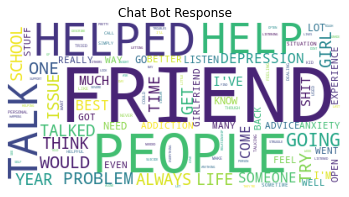

In [12]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

def cloud(text):
    wordcloud = WordCloud(background_color="white",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(df1['response_text'])


# NLP

## re

In [13]:


first_text = df1.response_text[4]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)



only really one friend who doesn t fit into the any of the above categories  her therapist calls it spiraling   anyway she pretty much calls me any time she is frustrated by something with  her boyfriend to ask me if it s logical or not  before they would just fight and he would call her crazy  now she asks me if it s ok he didn t say  please  when he said   hand me the remote  


In [14]:
#irrelevant stop words
text = nltk.word_tokenize(text)
text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

['really', 'one', 'friend', 'fit', 'categories', 'therapist', 'calls', 'spiraling', 'anyway', 'pretty', 'much', 'calls', 'time', 'frustrated', 'something', 'boyfriend', 'ask', 'logical', 'would', 'fight', 'would', 'call', 'crazy', 'asks', 'ok', 'say', 'please', 'said', 'hand', 'remote']


## Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)



['really', 'one', 'friend', 'fit', 'category', 'therapist', 'call', 'spiral', 'anyway', 'pretty', 'much', 'call', 'time', 'frustrate', 'something', 'boyfriend', 'ask', 'logical', 'would', 'fight', 'would', 'call', 'crazy', 'ask', 'ok', 'say', 'please', 'say', 'hand', 'remote']


In [16]:
# all words

description_list = []
for description in df1.response_text:
       
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [17]:


description_list[4]

'really one friend fit category therapist call spiral anyway pretty much call time frustrate something boyfriend ask logical would fight would call crazy ask ok say please say hand remote'

## bag of words

a simplifying representation used in natural language processing and information retrieval (IR)

In [18]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 100 Most Used Words: ['addiction', 'advice', 'alone', 'always', 'anxiety', 'anything', 'back', 'best', 'bring', 'call', 'care', 'come', 'comfort', 'could', 'deal', 'depression', 'describe', 'dont', 'end', 'even', 'everything', 'experience', 'face', 'feel', 'find', 'friend', 'get', 'gf', 'girl', 'girlfriend', 'give', 'go', 'good', 'grade', 'happen', 'help', 'helpful', 'issue', 'kid', 'kill', 'know', 'last', 'let', 'life', 'like', 'listen', 'little', 'look', 'lot', 'make', 'many', 'may', 'much', 'need', 'never', 'night', 'offer', 'often', 'one', 'open', 'others', 'people', 'person', 'personal', 'pretty', 'problem', 'really', 'relationship', 'say', 'school', 'see', 'self', 'severe', 'share', 'shit', 'similar', 'simply', 'situation', 'someone', 'sometimes', 'start', 'struggle', 'stuff', 'suicide', 'support', 'talk', 'tell', 'think', 'though', 'time', 'trouble', 'try', 'use', 'want', 'way', 'week', 'well', 'work', 'would', 'year']


/home/ines/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



# Second sheet

In [19]:
df2 = pd.read_csv("Sheet_2.csv", encoding= 'unicode_escape')

In [20]:
df2

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [21]:
df2 = df2[["class", "resume_text"]]

In [22]:
df2

,class,resume_text
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...
120,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,not_flagged,\rResearch and Teaching Assistant - University...
122,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [23]:
df2.isnull().sum()

class          0
resume_text    0
dtype: int64

In [24]:
fig = px.histogram(df1, x='class', title='distribution of records')
fig.show()

## Clean

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
def tokenize_text(df2, input_col='resume_text', output_col="word_list"):
    """
    takes a dataset and name of a column
    then tokenizes the text in the column of that dataset
    """
    df2.loc[:, output_col] = df2.loc[:, input_col].apply(lambda t: word_tokenize(t))
    return df2
    
df2 = tokenize_text(df2)

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
def remove_stopwords(list_of_words):
    filtered_list = [w for w in list_of_words if not w.lower() in stop_words]
    return filtered_list

def check_punct(list_of_words):
    """
    look at the tokenized text. if there was any punctuation, it is redundant.
    """
    filtered_list = []
    for word in list_of_words:
        if re.findall("[()!><.,`?'-:$£¢]", word):
            pass
        else: filtered_list.append(word)
        
    return filtered_list

def clean(df2, input_col='word_list', output_col="cleaned_word_list"):
    
    """
    takes a column of textual data 
    outputs a df with cleaned text attached
    """
    texts = df2.loc[:, input_col]
    word_list = []
    
    for text in texts: 
        t = remove_stopwords(text)
        t = check_punct(t)
        word_list.append(t)
        
    df2.loc[:, output_col] = word_list
    
    return df2

df2 = clean(df2)

In [29]:


def try_this(t):
    try: word_tokenize(t)
    except: print(t)



In [30]:
df2.head(1)

,class,resume_text,word_list,cleaned_word_list
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...,"[Customer, Service, Supervisor/Tier, -, Isabel...","[Customer, Service, Isabella, Catalog, Company..."


In [31]:
def join_tokens(df2, tokens_arrays_col):
    return [" ".join(df2.loc[i, tokens_arrays_col]) for i in range(len(df2))]

df2.loc[:, 'cleaned_text'] = join_tokens(df2, 'cleaned_word_list')

In [32]:
df_f = df2[df2['class'] == 'flagged']
df_n = df2[df2['class'] == 'not_flagged']


### Create a data frame with count and TFIDF scores for words

We want to analyze words and see how each type of record presents itself!

In [33]:
def count_words(tokens_arrays):
    """
    gets a dictionary and counts the values
    output: a sorted dict
    note: you can also use a bag of words package to do this
    """
    count_dict = {}
    for array_ in tokens_arrays:
        for word in array_:
            try: count_dict[word] +=1
            except: count_dict[word] = 1

    # sort 
    sorted_count_dict = {k:v for k,v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}
    
    return sorted_count_dict

In [34]:
def get_n_key_and_value(n, dict_):

    """
    get the first - most frequent and important -
    words of dictionary 
    """
    keys = [k for (k, v) in dict_.items()][:n]
    values = [v for (k, v) in dict_.items()][:n]

    return keys, values

In [35]:
def convert_tokens_list_to_freq_df(tokens_arrays, n=-1):
    """
    gets the array of tokenized sentences
    output: a sorted dataframe with two cols
    the words and their frequency
    """

    dict_ = count_words(tokens_arrays)
    keys, values = get_n_key_and_value(n, dict_)

    df2 = pd.DataFrame({'words': keys, 'freq': values})

    return df2

df_f_words_freq = convert_tokens_list_to_freq_df(df_f.cleaned_word_list)
df_n_words_freq = convert_tokens_list_to_freq_df(df_n.cleaned_word_list)

In [36]:


df_f_words_freq.head()



,words,freq
0,data,151
1,VT,121
2,University,121
3,Research,87
4,analysis,82


In [37]:
def get_tfidf_words_and_array(text_arrays):

    vectorizer = TfidfVectorizer()
    transformed_data = vectorizer.fit_transform(text_arrays).toarray()
    words = vectorizer.get_feature_names_out()
    
    return transformed_data, words

In [38]:
def create_tfidf_df(text_arrays):
    """
    gets the df, converts it into tfidf arrays and words
    then puts them in a dataset
    """

    transformed_data, words = get_tfidf_words_and_array(text_arrays)

    df = pd.DataFrame(data=transformed_data, columns=words).sum().reset_index()

    col_names = ['words', 'tfidf_score_sum']
    default_col_names = df.columns

    # rename whatever the df cols are called to the col_names
    df.rename(columns={default_col_names[i]:col_names[i] for i in range(len(col_names))}, inplace=True)

    return df

In [39]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_scores_f = create_tfidf_df(df_f.loc[:, 'cleaned_text'])
tfidf_scores_n = create_tfidf_df(df_n.loc[:, 'cleaned_text'])

In [41]:
def merge(df_1, df_2, on='words'):
    return pd.merge(left=df_1, right=df_2, on=on, how='left')

In [42]:
f_words_df = merge(df_f_words_freq, tfidf_scores_f)
n_words_df = merge(df_n_words_freq, tfidf_scores_n)

In [43]:
f_words_df.head(4)

,words,freq,tfidf_score_sum
0,data,151,2.540163
1,VT,121,NaN
2,University,121,NaN
3,Research,87,NaN


In [44]:
# n most frequent
n = 30

fig = px.bar(
    data_frame=f_words_df[:n], x='words', y='freq', color='freq',
    text='tfidf_score_sum', labels={'x': 'words', 'y': 'frequency'},
    title='Frequency of words seen in <b> Flagged </b>records (with TFIDF in parentheses)' )

fig.update_xaxes(tickangle= -45)  
fig.update_traces(
    texttemplate='%{text:.2f}', textposition='outside',
     textfont_size=8)
     
fig.show()

In [45]:
n_words_df = n_words_df.add_suffix('_n')
n_words_df.rename(columns={'words_n': 'words'}, inplace=True)

f_words_df = f_words_df.add_suffix('_f')
f_words_df.rename(columns={'words_f': 'words'}, inplace=True)

merged_df = merge(f_words_df, n_words_df)

In [46]:


merged_df



,words,freq_f,tfidf_score_sum_f,freq_n,tfidf_score_sum_n
0,data,151,2.540163,224.0,2.623857
1,VT,121,NaN,331.0,NaN
2,University,121,NaN,240.0,NaN
3,Research,87,NaN,192.0,NaN
4,analysis,82,1.460885,134.0,2.321371
...,...,...,...,...,...
5787,Academy,1,NaN,11.0,NaN
5788,Paul,1,NaN,3.0,NaN
5789,Ehrlich,1,NaN,NaN,NaN
5790,Carried,1,NaN,1.0,NaN


In [47]:
merged_df_sample = merged_df[:n]
fig = go.Figure(data=[
    go.Bar(name='Flagged', x=merged_df_sample.words, y=merged_df_sample.freq_f, text=merged_df_sample.freq_f, marker_color='#BA0F30'),
    go.Bar(name='Not Flagged', x=merged_df_sample.words, y=merged_df_sample.freq_n, text=merged_df_sample.freq_n, marker_color='#98D7C2')
])


fig.update_xaxes(tickangle= -45)  
fig.update_traces(
    texttemplate='%{text:d}', textposition='outside',
     textfont_size=8)

# Change the bar mode
fig.update_layout(barmode='group', title_text='most frequent Flagged/not flagged words count comparison')
fig.show()

## Classification: NB

In [48]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [49]:


transformed_data, words = get_tfidf_words_and_array(df2.loc[:, 'cleaned_text'])
y = df2.loc[:, 'class']



In [50]:
y

0      not_flagged
1      not_flagged
2      not_flagged
3      not_flagged
4          flagged
          ...     
120    not_flagged
121    not_flagged
122    not_flagged
123        flagged
124    not_flagged
Name: class, Length: 125, dtype: object

In [51]:
transformed_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
words

array(['__', '_ù__µàëùä', 'aa', ..., 'îà', 'îâ', 'ô_torrent'],
      dtype=object)

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, transformed_data, y, cv=3)
scores

array([0.76190476, 0.71428571, 0.68292683])

## RF

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, transformed_data, y, cv=3)
scores

array([0.73809524, 0.73809524, 0.73170732])

## DL

In [55]:
import tensorflow as tf
import keras

from tensorflow.keras import layers
from sklearn.model_selection import KFold
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, SimpleRNN, BatchNormalization

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-02-01 23:34:16.353099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 23:34:17.617334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-02-01 23:34:17.617425: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-02-01 23:34:17.617434: W tensorflow/compiler/tf2tensorr

In [56]:
df2

,class,resume_text,word_list,cleaned_word_list,cleaned_text
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...,"[Customer, Service, Supervisor/Tier, -, Isabel...","[Customer, Service, Isabella, Catalog, Company...",Customer Service Isabella Catalog Company Sout...
1,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...,"[Engineer, /, Scientist, -, IBM, Microelectron...","[Engineer, Scientist, IBM, Microelectronics, D...",Engineer Scientist IBM Microelectronics Divisi...
2,not_flagged,\rLTS Software Engineer Computational Lithogra...,"[LTS, Software, Engineer, Computational, Litho...","[LTS, Software, Engineer, Computational, Litho...",LTS Software Engineer Computational Lithograph...
3,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...,"[TUTOR, Williston, VT, -, Email, me, on, Indee...","[TUTOR, Williston, VT, Email, Indeed, WORK, EX...",TUTOR Williston VT Email Indeed WORK EXPERIENC...
4,flagged,\rIndependent Consultant - Self-employed\rBurl...,"[Independent, Consultant, -, Self-employed, Bu...","[Independent, Consultant, Burlington, VT, Emai...",Independent Consultant Burlington VT Email Ind...
...,...,...,...,...,...
120,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....,"[Brattleboro, VT, -, Email, me, on, Indeed, :,...","[Brattleboro, VT, Email, Indeed, Skilled, pres...",Brattleboro VT Email Indeed Skilled presenter ...
121,not_flagged,\rResearch and Teaching Assistant - University...,"[Research, and, Teaching, Assistant, -, Univer...","[Research, Teaching, Assistant, University, Ve...",Research Teaching Assistant University Vermont...
122,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...,"[Medical, Coder, -, Highly, Skilled, -, Entry,...","[Medical, Coder, Highly, Skilled, Entry, Level...",Medical Coder Highly Skilled Entry Level Sudbu...
123,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...,"[Waterbury, VT, -, Email, me, on, Indeed, :, i...","[Waterbury, VT, Email, Indeed, Willing, reloca...",Waterbury VT Email Indeed Willing relocate Any...


In [57]:
text = df2.loc[:, 'resume_text'].values
pad_type = 'post'
trunc_type='post'

# Tokenize our training data
tokenizer = Tokenizer()
texts = [str (item) for item in df2.loc[:, 'resume_text']]
tokenizer.fit_on_texts(texts)

# word index = {'word': idx}
word_index = tokenizer.word_index

# Encode into sequences
encoded_seqs = tokenizer.texts_to_sequences(texts)

In order to decide for the padding, we need to see how the distribution of words is. So to do that, we map the encoded sequence in a histogram and then decide for the padding length.

In [58]:
padded_lengths = [len(encoded_seqs_i) for encoded_seqs_i in encoded_seqs]
px.histogram(padded_lengths)

In [59]:
max_len = 1000
padded_texts = pad_sequences(encoded_seqs, padding=pad_type, truncating=trunc_type, maxlen=max_len)

In [60]:
# Output the results
random_i = np.random.randint(len(df2))

print("Encoded sample:", encoded_seqs[random_i])
print("Padded sample:", padded_texts[random_i])
print("Padded shape:", padded_texts.shape)
print("sequences data type:", type(encoded_seqs))
print("Padded  sequences data type:", type(padded_texts))

Encoded sample: [346, 1, 229, 143, 21, 3, 4281, 11, 55, 44, 10, 19, 19, 39, 28, 15111, 202, 9, 8, 2450, 1041, 27, 130, 1, 36, 190, 8, 742, 1, 918, 1167, 2026, 722, 15112, 5, 793, 1879, 3, 8, 37, 255, 2765, 286, 8, 78, 1029, 2, 871, 441, 1862, 835, 9, 8, 2936, 2, 2165, 45, 1, 104, 2, 1358, 5, 708, 15113, 36, 271, 3, 396, 67, 1215, 2, 382, 512, 2, 26, 4, 5, 105, 6, 173, 246, 1586, 1, 229, 831, 3, 35, 193, 2, 6343, 401, 1914, 1, 63, 48, 17, 3, 15114, 110, 185, 4, 3964, 79, 1643, 1250, 15, 1138, 1, 79, 3, 73, 373, 726, 15115, 15116, 1, 84, 58, 206, 14, 1220, 15117, 1, 5873, 15, 1751, 2, 165, 62, 15118, 1, 263, 15, 597, 3, 1246, 473, 798, 52, 96, 1, 373, 32, 313, 1290, 1250, 47, 15119, 1112, 1250, 47, 1915, 1521, 2086, 15120, 524, 593, 1401, 597, 264, 976, 1, 1069, 15121, 2009, 15122, 1, 851, 1932, 149, 2, 15123, 203, 273, 1, 755, 740, 4, 2720, 2626, 403, 5667, 1, 621, 3, 242, 807, 612, 1349, 367, 335, 2424, 367, 1386, 1689, 1, 6135, 174, 15124, 273, 15125, 15126, 109, 2, 15127, 1, 15128, 3

### RNN

In [61]:
num_features = len(word_index) + 1

In [62]:
def to_categorical_tensor(x, num_classes=num_features, max_len=max_len):
    """
    x: [0, 1, 2, 3]
    output: tensor of one hot encoded text
    with the shape of (max sequence length, number of features) 
    """
    if type(x) != list: a = list(x)
    a = tf.keras.utils.to_categorical(x, num_classes)
    a = tf.constant(a, shape=[max_len, num_classes])
    return a

sample = to_categorical_tensor(x= padded_texts[0])
print(sample.shape)

(1000, 15469)


2023-02-01 23:34:35.379190: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-01 23:34:35.379221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-02-01 23:34:35.388974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
# one-hot-encoding
X = [to_categorical_tensor(padded_texts[i]) for i in range(len(df2))]

# converting into an array
X_final = np.reshape(X, (len(X), max_len, num_features))

In [64]:
labels = np.array([1 if label=='flagged' else 0 for label in df2.loc[:, 'class']])

In [65]:
def create_simpleRNN(rnn_nodes=32):

    model = Sequential([
        SimpleRNN(32, input_shape=(max_len, num_features)),
        BatchNormalization(),
        Dense(1, activation="sigmoid")
        ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

model = create_simpleRNN()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                496064    
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 496,225
Trainable params: 496,161
Non-trainable params: 64
_________________________________________________________________


In [66]:
n_epochs = 3
n_splits = 3
batch_s = 32 # the default is 32
mean_val_acc_models = {}

def evaluate(X, Y, model_, n_epochs=3, n_splits=3, batch_s=32):
    """
    Evaluates each model with cross validation
    """
    history = {}
    kfold = KFold(n_splits)
    splits = kfold.split(X)

    for i, (train_index, val_index) in enumerate(splits):

        print(f'\nfold {i+1}')
        model = model_()

        train_x = X[train_index]
        train_y = Y[train_index]

        val_x = X[val_index]
        val_y = Y[val_index]

        history[f'fold {i}'] = model.fit(
            train_x, train_y, epochs=n_epochs, batch_size=batch_s, verbose=2,
             validation_data=(val_x, val_y)).history
    mean_val_acc = [np.mean(hist['val_accuracy']) for hist in history.values()]
    return mean_val_acc

### GRU

In [67]:
def create_GRU(embedding_dim=32, gru_d=32):

    model = Sequential([
        Embedding(input_dim=num_features, output_dim=embedding_dim, input_length=max_len),
        GRU(gru_d),
        BatchNormalization(),
        Dense(1, activation="sigmoid")
        ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

model = create_GRU()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          495008    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 501,505
Trainable params: 501,441
Non-trainable params: 64
_________________________________________________________________


### LSTM (Long Short-term Memory)

In [68]:
def create_LSTM(embedding_dim=32, lstm_u=32):

    model = Sequential([
        Embedding(input_dim=num_features, output_dim=embedding_dim, input_length=max_len),
        LSTM(lstm_u),
        BatchNormalization(),
        Dense(1, activation="sigmoid")
        ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

model = create_GRU()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 32)          495008    
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 501,505
Trainable params: 501,441
Non-trainable params: 64
_________________________________________________________________
